### 1. Import and read the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
df=pd.read_csv(r"C:\Users\Administrator\Downloads\telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [2]:
# Checking number of columns and rows
df.shape

(99999, 226)

In [3]:
# checking datatypes,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


In [4]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
# Checking the value counts of all the columns...
for i in df.columns:
    print(df[i].value_counts())

7002374769    1
7001115332    1
7000945323    1
7001852588    1
7000146605    1
7001306145    1
7000150703    1
7002072271    1
7001815730    1
7001551539    1
7001279156    1
7000759698    1
7001938614    1
7000363703    1
7001941142    1
7000997179    1
7001029442    1
7000771260    1
7000125682    1
7000667800    1
7001166527    1
7000630393    1
7000728257    1
7001209514    1
7000285865    1
7000053447    1
7000162965    1
7001733395    1
7001521153    1
7001928331    1
             ..
7000687925    1
7002117520    1
7002119569    1
7001982354    1
7002377619    1
7000755080    1
7002114279    1
7002373469    1
7001081194    1
7001340635    1
7000010079    1
7001755485    1
7000448353    1
7001886051    1
7001896292    1
7000190311    1
7001913145    1
7000825193    1
7000464957    1
7002031482    1
7000528331    1
7001353583    1
7000348016    1
7000211997    1
7001929076    1
7001315706    1
7000616311    1
7000389462    1
7001775481    1
7000817664    1
Name: mobile_number, Len

Name: offnet_mou_7, Length: 31023, dtype: int64
0.00       4176
0.03         40
0.41         39
1.01         37
0.18         35
0.01         34
0.21         31
1.08         30
0.31         29
1.81         29
0.10         29
0.28         28
0.16         28
0.53         28
0.40         28
0.13         28
0.66         28
0.23         27
0.93         27
0.36         27
0.56         27
0.35         27
0.15         26
0.48         26
0.70         26
0.46         25
0.06         25
0.26         25
1.16         25
0.68         24
           ... 
360.46        1
793.68        1
865.09        1
334.46        1
335.38        1
895.36        1
5738.13       1
518.93        1
140.43        1
480.16        1
307.08        1
133.91        1
763.48        1
537.59        1
316.48        1
464.78        1
418.14        1
1555.08       1
1567.06       1
359.01        1
459.23        1
449.66        1
595.98        1
657.78        1
387.74        1
158.98        1
1108.21       1
1905.51       1
201.94  

Name: loc_og_t2t_mou_8, Length: 13336, dtype: int64
0.00       16320
0.68         108
1.01         107
0.28         104
0.36         102
0.56         101
0.41         101
0.61         101
0.76         100
0.66          98
0.58          97
0.40          97
0.81          97
0.88          95
0.53          95
0.51          94
0.26          93
0.46          93
0.38          93
0.63          92
0.73          91
0.43          90
0.96          90
1.13          90
0.33          90
0.78          88
0.23          88
0.31          88
1.06          86
0.48          86
           ...  
195.64         1
364.59         1
365.41         1
330.78         1
347.19         1
861.08         1
106.73         1
215.73         1
272.78         1
385.89         1
20.50          1
694.63         1
176.76         1
419.41         1
305.68         1
78.36          1
244.64         1
664.21         1
802.31         1
375.76         1
62.61          1
109.26         1
835.61         1
210.18         1
144.88       

Name: loc_og_t2f_mou_8, Length: 3807, dtype: int64
0.00      54667
0.38        217
0.26        200
0.31        199
0.28        197
0.23        196
0.51        190
0.56        189
0.33        184
0.21        183
0.41        177
0.58        176
0.40        174
0.36        172
0.46        172
0.45        171
0.43        171
0.53        170
0.30        167
0.35        166
0.25        166
0.61        165
0.48        161
0.73        161
0.68        159
0.66        158
0.63        156
0.16        154
0.60        153
0.71        150
          ...  
46.76         1
55.83         1
90.16         1
57.44         1
30.23         1
122.79        1
69.94         1
19.69         1
50.09         1
90.66         1
95.46         1
46.74         1
29.21         1
53.36         1
60.31         1
90.84         1
31.41         1
221.64        1
47.59         1
97.79         1
174.19        1
50.08         1
71.04         1
65.66         1
29.43         1
25.08         1
101.68        1
116.46        1
128.5

Name: std_og_t2m_mou_9, Length: 19052, dtype: int64
0.00      84451
0.53         67
0.38         67
0.41         63
0.36         63
0.40         63
0.26         63
0.61         62
0.48         61
0.31         60
0.51         59
0.23         59
0.35         57
0.43         57
0.50         57
0.60         56
0.18         56
0.55         55
0.46         54
0.28         53
0.70         52
0.33         52
0.58         51
0.81         51
0.65         51
0.45         51
0.63         49
0.16         49
0.21         48
0.66         47
          ...  
27.54         1
42.63         1
28.51         1
31.91         1
29.79         1
151.63        1
12.84         1
27.45         1
34.09         1
160.39        1
67.36         1
56.16         1
18.68         1
18.33         1
17.56         1
18.54         1
37.06         1
34.91         1
19.68         1
55.19         1
9.69          1
43.33         1
69.56         1
30.89         1
48.64         1
25.73         1
45.03         1
33.51         1
41.7

Name: spl_og_mou_6, Length: 3965, dtype: int64
0.00      50442
0.01        378
0.21        259
0.03        256
0.08        240
0.06        239
0.05        234
0.16        222
0.13        193
0.11        191
0.66        187
0.18        182
0.38        176
0.20        174
0.10        171
0.58        171
0.71        168
0.73        166
0.36        165
0.23        165
0.63        160
0.26        160
0.70        159
0.68        159
0.81        159
0.83        158
0.61        157
0.41        156
0.56        155
0.28        153
          ...  
81.01         1
34.79         1
54.86         1
142.88        1
62.23         1
312.58        1
340.31        1
56.76         1
50.76         1
35.01         1
46.79         1
15.65         1
51.05         1
65.49         1
295.89        1
71.31         1
133.41        1
187.39        1
60.33         1
313.33        1
101.11        1
101.39        1
30.63         1
273.88        1
100.53        1
28.20         1
123.83        1
144.23        1
118.69   

Name: total_og_mou_9, Length: 39160, dtype: int64
0.00       12379
0.38         104
0.33         100
0.36         100
0.43          97
0.40          97
0.21          94
0.31          94
0.53          94
0.48          93
0.63          93
0.18          92
0.28          92
0.58          91
0.30          89
0.68          88
0.56          85
0.66          84
0.81          83
0.45          83
0.78          83
0.35          82
0.76          82
0.91          82
0.73          81
1.01          81
0.26          80
0.46          80
0.50          80
1.63          79
           ...  
274.03         1
143.51         1
159.06         1
1400.21        1
188.06         1
99.51          1
373.78         1
228.64         1
178.48         1
34.50          1
97.43          1
211.13         1
180.38         1
301.88         1
129.31         1
1142.91        1
154.88         1
325.94         1
142.76         1
177.08         1
86.23          1
164.11         1
207.33         1
165.39         1
413.28         

Name: loc_ic_t2f_mou_8, Length: 7097, dtype: int64
0.00      35854
0.25        261
0.41        256
0.26        247
0.45        241
0.35        239
0.30        233
0.46        232
0.31        232
0.23        231
0.33        230
0.38        230
0.28        229
0.53        227
0.40        220
0.48        218
0.43        216
0.21        209
0.56        206
0.51        204
0.36        197
0.18        194
0.68        192
0.50        189
0.66        186
0.63        183
0.20        178
0.78        176
0.91        175
0.61        173
          ...  
121.06        1
113.66        1
196.99        1
195.83        1
71.49         1
99.86         1
143.06        1
285.88        1
57.26         1
326.66        1
70.39         1
102.11        1
190.61        1
221.39        1
24.89         1
67.26         1
101.74        1
54.24         1
65.61         1
9.50          1
46.76         1
231.49        1
263.41        1
186.71        1
116.46        1
116.04        1
185.84        1
192.41        1
114.5

Name: std_ic_t2m_mou_9, Length: 8933, dtype: int64
0.00      75459
0.31        179
0.43        170
0.33        169
0.20        147
0.41        146
0.28        143
0.56        140
0.36        138
0.35        138
0.30        135
0.23        135
0.25        134
0.18        129
0.21        129
0.13        127
0.26        123
0.48        123
0.51        122
0.45        121
0.38        120
0.46        118
0.15        115
0.53        113
0.55        111
0.40        110
0.11        108
0.68        107
0.16        107
0.10        106
          ...  
20.03         1
52.28         1
22.30         1
180.43        1
120.09        1
11.25         1
26.40         1
59.44         1
62.78         1
16.80         1
104.76        1
174.94        1
28.59         1
365.54        1
82.06         1
47.26         1
31.33         1
135.74        1
118.64        1
11.70         1
14.03         1
111.43        1
113.96        1
28.49         1
34.48         1
41.64         1
75.26         1
20.94         1
29.58

0.00     75316
0.15      1653
0.18       948
0.06       895
0.13       893
0.20       764
0.28       738
0.05       699
0.30       676
0.08       656
0.11       591
0.21       587
0.10       571
0.26       531
0.36       524
0.23       512
0.43       479
0.33       415
0.45       398
0.31       390
0.16       390
0.38       383
0.25       333
0.03       330
0.34       324
0.41       320
0.19       298
0.58       279
0.29       278
0.24       272
         ...  
0.09        73
0.69        73
0.55        45
0.88        43
0.81        38
0.90        38
0.76        37
0.86        31
0.78        31
0.83        28
0.65        25
0.74        23
0.79        22
0.84        20
0.70        19
0.80        13
0.85        10
0.04         8
6.74         1
1.00         1
1.21         1
1.03         1
19.76        1
2.99         1
0.99         1
1.33         1
2.18         1
2.83         1
2.33         1
3.56         1
Name: spl_ic_mou_6, Length: 84, dtype: int64
0.00     85588
0.20      1254
0.18      

Name: ic_others_8, Length: 1896, dtype: int64
0.00      72018
0.06        566
0.10        518
0.08        495
0.13        364
0.11        325
0.18        310
0.16        309
0.21        309
0.05        307
0.25        295
0.01        273
0.23        259
0.15        257
0.31        242
0.28        237
0.33        236
0.26        236
0.20        232
0.43        223
0.38        215
0.41        204
0.36        202
0.46        200
0.30        195
0.51        190
0.48        190
0.53        187
0.40        154
0.03        152
          ...  
25.24         1
34.39         1
14.14         1
30.63         1
51.41         1
17.71         1
17.54         1
40.96         1
29.11         1
27.28         1
15.73         1
15.71         1
15.54         1
17.64         1
16.50         1
72.49         1
59.26         1
50.05         1
29.33         1
32.16         1
14.66         1
15.58         1
205.18        1
41.69         1
27.56         1
26.40         1
43.53         1
13.49         1
30.54     

8/31/2014    14706
8/30/2014    11707
8/29/2014    10057
8/28/2014     9816
8/26/2014     9297
8/24/2014     7722
8/25/2014     7655
8/27/2014     5688
8/22/2014     2017
8/20/2014     1986
8/23/2014     1806
8/19/2014     1590
8/21/2014     1347
8/18/2014     1027
8/9/2014       984
8/5/2014       943
8/14/2014      890
8/15/2014      813
8/16/2014      756
8/17/2014      735
8/12/2014      716
8/13/2014      705
8/8/2014       676
8/6/2014       618
8/11/2014      555
8/7/2014       447
8/10/2014      361
8/1/2014       254
8/2/2014       206
8/4/2014       170
8/3/2014       127
Name: date_of_last_rech_8, dtype: int64
9/29/2014    22623
9/30/2014    21713
9/28/2014    10601
9/27/2014     6473
9/26/2014     6282
9/25/2014     5617
9/24/2014     3224
9/21/2014     2888
9/20/2014     2579
9/23/2014     2435
9/22/2014     1617
9/19/2014     1109
9/16/2014      889
9/17/2014      753
9/18/2014      653
9/14/2014      608
9/11/2014      555
9/15/2014      535
9/10/2014      481
9/12/2014 

Name: count_rech_2g_6, dtype: int64
1.0     10495
0.0      5798
2.0      3377
3.0      1489
4.0      1121
5.0       848
6.0       622
7.0       437
8.0       369
10.0      248
9.0       214
11.0      159
12.0      133
13.0       56
14.0       54
15.0       32
16.0       29
18.0       19
17.0       13
19.0       13
20.0       11
23.0        6
21.0        5
22.0        5
27.0        3
26.0        3
24.0        2
32.0        2
25.0        1
48.0        1
29.0        1
28.0        1
30.0        1
43.0        1
31.0        1
35.0        1
Name: count_rech_2g_7, dtype: int64
1.0     10894
0.0      6046
2.0      3269
3.0      1607
4.0      1189
5.0       912
6.0       652
7.0       414
8.0       361
9.0       250
10.0      198
11.0      154
12.0      119
14.0       65
13.0       61
15.0       36
16.0       32
18.0       14
19.0       13
17.0       12
20.0        9
24.0        6
22.0        4
29.0        3
27.0        3
25.0        3
21.0        3
34.0        2
32.0        2
23.0        2
33.0

Name: vol_3g_mb_8, Length: 14960, dtype: int64
0.00       84638
0.01          18
0.04          17
0.02          16
0.03          14
0.06           9
0.19           7
0.20           7
0.09           7
0.23           6
0.26           6
0.29           6
0.24           6
0.14           6
0.22           5
0.12           5
0.13           5
0.18           5
0.05           5
0.25           4
0.11           4
2.44           4
0.46           4
0.08           4
2.39           4
458.13         3
1753.10        3
7.57           3
1055.81        3
58.93          3
           ...  
509.30         1
1056.37        1
215.84         1
984.33         1
3924.02        1
536.43         1
123.78         1
300.88         1
431.22         1
1397.09        1
1784.92        1
137.04         1
3609.05        1
219.17         1
879.32         1
5588.11        1
488.56         1
18.59          1
1154.16        1
651.34         1
1297.32        1
331.78         1
1715.77        1
821.78         1
1502.89        1
1

Name: sachet_2g_6, dtype: int64
0     86694
1      5177
2      2526
3      1327
4      1089
5       792
6       615
7       425
8       357
10      244
9       204
11      159
12      130
13       55
14       55
15       33
16       27
18       19
17       14
19       12
20       11
23        6
21        5
22        5
26        3
27        3
24        2
30        2
32        2
42        1
25        1
28        1
29        1
35        1
48        1
Name: sachet_2g_7, dtype: int64
0     85932
1      5789
2      2456
3      1446
4      1148
5       887
6       612
7       398
8       353
9       237
10      202
11      149
12      120
14       67
13       58
15       34
16       32
18       13
19       13
17       12
20        9
24        6
22        4
25        4
21        3
29        3
27        2
32        2
34        2
23        2
26        1
31        1
33        1
44        1
Name: sachet_2g_8, dtype: int64
0     85821
1      6004
2      2601
3      1757
4      1384
5       794
6   

### Missing values checking and imputation

In [6]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [7]:
#Dropping columns that are not useful
df=df.drop(['mobile_number'],axis=1)
df=df.drop(['circle_id'],axis=1)
df=df.drop(['last_date_of_month_6'],axis=1)
df=df.drop(['last_date_of_month_7'],axis=1)
df=df.drop(['last_date_of_month_8'],axis=1)
df=df.drop(['last_date_of_month_9'],axis=1)
df=df.drop(['date_of_last_rech_6'],axis=1)
df=df.drop(['date_of_last_rech_7'],axis=1)
df=df.drop(['date_of_last_rech_8'],axis=1)
df=df.drop(['date_of_last_rech_9'],axis=1)
df=df.drop(['date_of_last_rech_data_6'],axis=1)
df=df.drop(['date_of_last_rech_data_7'],axis=1)
df=df.drop(['date_of_last_rech_data_8'],axis=1)
df=df.drop(['date_of_last_rech_data_9'],axis=1)
df=df.drop(['fb_user_6'],axis=1)
df=df.drop(['fb_user_7'],axis=1)
df=df.drop(['fb_user_8'],axis=1)
df=df.drop(['fb_user_9'],axis=1)
df=df.drop(['night_pck_user_6'],axis=1)
df=df.drop(['night_pck_user_7'],axis=1)
df=df.drop(['night_pck_user_8'],axis=1)
df=df.drop(['night_pck_user_9'],axis=1)

In [8]:
df.shape

(99999, 204)

In [9]:
#Checking column with more than 1% null data
col_null = df.columns[round(100*(df.isnull().sum()/len(df.index)), 2) > 1.00 ]
col_null.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [10]:
# Dropping columns that are not useful
df=df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)
df=df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [11]:
# Using Iterative Imputer for imputing missing values that are 5-10% missing value percantage

colss=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
      'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
      'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
      'loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
        'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9',
        'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
        'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_9',
        'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
        'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
          'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
          'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
          'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_9',
          'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
         'ic_others_6','ic_others_7','ic_others_8','ic_others_9','og_others_6','og_others_7','og_others_8','og_others_9']]

In [12]:
# Iterative Imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
ii = IterativeImputer(min_value = 0)
df_clean = pd.DataFrame(ii.fit_transform(colss))
df_clean.columns=colss.columns
df_clean.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_og_mou_6,roam_og_mou_7,...,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,og_others_6,og_others_7,og_others_8,og_others_9
0,132.51835,133.894695,0.00,130.040378,197.632613,195.657332,0.00,188.672644,14.356855,9.520575,...,0.0,3.703829,0.66437,0.50571,0.0,0.561558,0.510736,0.07071,0.0,0.067374
1,24.11000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
2,11.54000,55.240000,37.26,74.810000,143.330000,220.590000,208.36,118.910000,0.000000,0.000000,...,0.0,0.010000,0.93000,3.14000,0.0,0.360000,0.450000,0.00000,0.0,0.000000
3,99.91000,54.390000,310.98,241.710000,123.310000,109.010000,71.68,113.540000,0.000000,28.090000,...,0.0,0.000000,0.00000,0.00000,0.0,0.800000,0.000000,0.00000,0.0,0.000000
4,50.31000,149.440000,83.89,58.780000,76.960000,91.880000,124.26,45.810000,0.000000,0.000000,...,0.0,0.000000,0.48000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000


In [13]:
# Dropping the original columns and placing the columns after imputing the missing values with iterative imputer

df=df.drop(columns=['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
      'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
      'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
      'loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
        'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9',
        'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
        'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_9',
        'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
        'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
          'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
          'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
          'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_9',
          'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
         'ic_others_6','ic_others_7','ic_others_8','ic_others_9','og_others_6','og_others_7','og_others_8','og_others_9'])
df1=pd.concat([df,df_clean],axis=1)
df1.head()

,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,...,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,og_others_6,og_others_7,og_others_8,og_others_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,3.703829,0.66437,0.50571,0.0,0.561558,0.510736,0.07071,0.0,0.067374
1,34.047,355.074,268.321,86.285,40.31,178.53,312.44,72.11,26.83,104.23,...,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
2,167.690,189.058,210.226,290.714,155.33,412.94,285.46,124.94,370.04,519.53,...,0.0,0.010000,0.93000,3.14000,0.0,0.360000,0.450000,0.00000,0.0,0.000000
3,221.338,251.102,508.054,389.500,223.23,135.31,352.21,362.54,280.08,216.61,...,0.0,0.000000,0.00000,0.00000,0.0,0.800000,0.000000,0.00000,0.0,0.000000
4,261.636,309.876,238.174,163.426,127.28,241.33,208.16,104.59,216.44,198.29,...,0.0,0.000000,0.48000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000


In [14]:
df1.shape

(99999, 195)

In [15]:
# fill nan with zeros where required
nan_cols= ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
     'max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
     'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7',
     'av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7',
     'arpu_2g_8','arpu_2g_9']

df1[nan_cols] = df1[nan_cols].fillna(0)

In [16]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
total_og_mou_9        0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
                     ... 
std_ic_t2t_mou_9      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_m

In [17]:
df1.head()

,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,...,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,og_others_6,og_others_7,og_others_8,og_others_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,3.703829,0.66437,0.50571,0.0,0.561558,0.510736,0.07071,0.0,0.067374
1,34.047,355.074,268.321,86.285,40.31,178.53,312.44,72.11,26.83,104.23,...,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
2,167.690,189.058,210.226,290.714,155.33,412.94,285.46,124.94,370.04,519.53,...,0.0,0.010000,0.93000,3.14000,0.0,0.360000,0.450000,0.00000,0.0,0.000000
3,221.338,251.102,508.054,389.500,223.23,135.31,352.21,362.54,280.08,216.61,...,0.0,0.000000,0.00000,0.00000,0.0,0.800000,0.000000,0.00000,0.0,0.000000
4,261.636,309.876,238.174,163.426,127.28,241.33,208.16,104.59,216.44,198.29,...,0.0,0.000000,0.48000,0.00000,0.0,0.000000,0.000000,0.00000,0.0,0.000000


### Derived new columns (new features)

In [18]:
# Deriving new features from 6,7,8 months data
df1['total_onnet_offnet_mou_678']=df1['onnet_mou_6']+df1['offnet_mou_6']+df1['onnet_mou_7']+df1['offnet_mou_7']+df1['onnet_mou_8']+df1['offnet_mou_8']
df1['total_loc_og_ic_mou_678']= df1['loc_og_mou_6']+df1['loc_ic_mou_6']+df1['loc_og_mou_7']+df1['loc_ic_mou_7']+df1['loc_og_mou_8']+df1['loc_ic_mou_8']
df1['total_std_og_ic_mou_678']= df1['std_ic_mou_6']+df1['std_og_mou_6']+df1['std_ic_mou_7']+df1['std_og_mou_7']+df1['std_og_mou_8']+df1['loc_ic_mou_8']
df1['total_isd_og_ic_mou_678']= df1['isd_og_mou_6']+df1['isd_ic_mou_6']+df1['isd_og_mou_7']+df1['isd_ic_mou_7']+df1['isd_og_mou_8']+df1['isd_ic_mou_8']
df1['total_og_ic_mou_678']= df1['total_ic_mou_6']+df1['total_og_mou_6']+df1['total_ic_mou_7']+df1['total_og_mou_7']+df1['total_ic_mou_8']+df1['total_og_mou_8']

In [19]:
df1.shape

(99999, 200)

### Filtering High value customers

In [20]:
# Filtering high value customers

df1['total_rech_6'] = df1['total_rech_amt_6'] + df1['av_rech_amt_data_6']
df1['total_rech_7'] = df1['total_rech_amt_7'] + df1['av_rech_amt_data_7']

df1['avg_rech_6/7'] = df1[['total_rech_6','total_rech_7']].mean(axis=1)


df2 = df1[(df1['avg_rech_6/7']>= df1['avg_rech_6/7'].quantile(0.7))]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Columns: 203 entries, arpu_6 to avg_rech_6/7
dtypes: float64(170), int64(33)
memory usage: 46.7 MB


In [21]:
# Dropping columns that are created

df2=df2.drop(['avg_rech_6/7'],axis=1)
df2=df2.drop(['total_rech_6'],axis=1)
df2=df2.drop(['total_rech_7'],axis=1)

In [22]:
len(df2)

30015

### Deriving churn

In [23]:
df2.columns.tolist()
total_col= df2.columns.tolist()

In [24]:
df2['total_calling_mou_9'] = df2['total_ic_mou_9'] + df2['total_og_mou_9']
df2['total_data_mou_9'] = df2['vol_2g_mb_9'] + df2['vol_3g_mb_9']

df2['churn'] = np.where((df2['total_calling_mou_9'] == 0) & (df2['total_data_mou_9'] == 0),1,0)

In [25]:
df2['churn']

0        1
7        1
8        0
16       0
21       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
60       0
61       0
67       1
69       0
73       0
77       0
87       0
92       0
96       0
101      0
102      0
103      0
105      0
111      1
115      0
122      0
124      0
131      0
        ..
99902    0
99904    0
99921    0
99922    0
99923    0
99924    0
99925    0
99927    0
99929    0
99931    0
99932    0
99935    0
99937    0
99939    0
99941    0
99942    0
99943    0
99957    0
99959    0
99961    1
99963    0
99965    0
99970    0
99974    0
99981    0
99984    0
99986    0
99988    0
99997    0
99998    1
Name: churn, Length: 30015, dtype: int32

In [26]:
df2['churn'].value_counts()

0    27555
1     2460
Name: churn, dtype: int64

Text(0.5, 0, 'Churn')

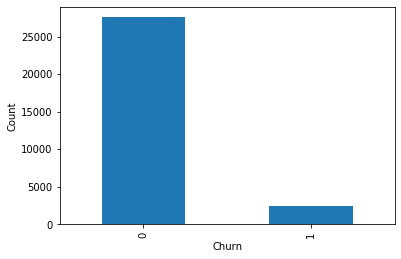

In [27]:
# Plotting
df2['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn')

In [28]:
# Drop created columns
df2 = df2.drop(['total_calling_mou_9'],axis=1)

In [29]:
df2 = df2.drop(['total_data_mou_9'],axis=1)

#### Dropping 9th month columns

In [30]:
# Dropping 9th month columns
df2=df2.drop(['isd_ic_mou_9','total_rech_num_9','arpu_9','total_og_mou_9','total_ic_mou_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9',
             'max_rech_data_9','count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_2g_9','arpu_3g_9',
             'monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g','onnet_mou_9','offnet_mou_9','roam_og_mou_9','roam_ic_mou_9',
             'loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9',
             'std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9',
             'loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9',
             'spl_ic_mou_9','ic_others_9','og_others_9'],axis=1)

In [31]:
df2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,ic_others_8,og_others_6,og_others_7,og_others_8,total_onnet_offnet_mou_678,total_loc_og_ic_mou_678,total_std_og_ic_mou_678,total_isd_og_ic_mou_678,total_og_ic_mou_678,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,4,...,0.00,0.510736,0.07071,0.0,659.70299,626.513701,415.2669,7.638267,5.44,1
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,...,15.14,0.000000,0.00000,0.0,1511.31000,2183.010000,755.5000,58.370000,3060.17,1
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,...,0.00,0.000000,0.00000,0.0,1111.57000,850.360000,414.9000,0.000000,1260.47,0
16,430.975,299.869,187.894,346.81,286.01,233.38,364.86,381.56,294.46,10,...,0.00,0.000000,0.00000,0.0,883.92000,1455.950000,571.0100,0.230000,1907.08,0
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,22,...,0.00,0.000000,0.00000,0.0,2957.66000,692.990000,2921.8500,0.000000,3557.69,0


In [32]:
df2.columns.tolist()
total_col= df2.columns.tolist()
print(total_col)
print(len(total_col))

['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6

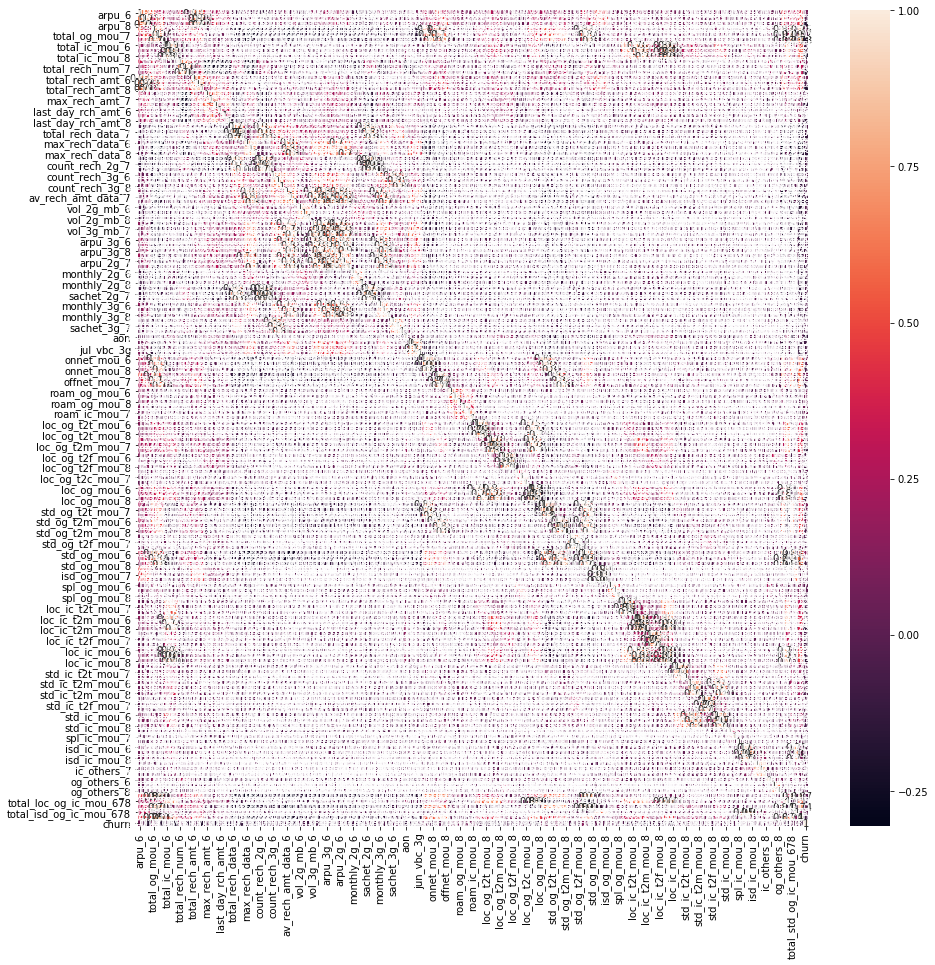

In [33]:
# Plotting Correlation
df2.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(df2.corr(),annot=True)

### Outliers checking and treatment

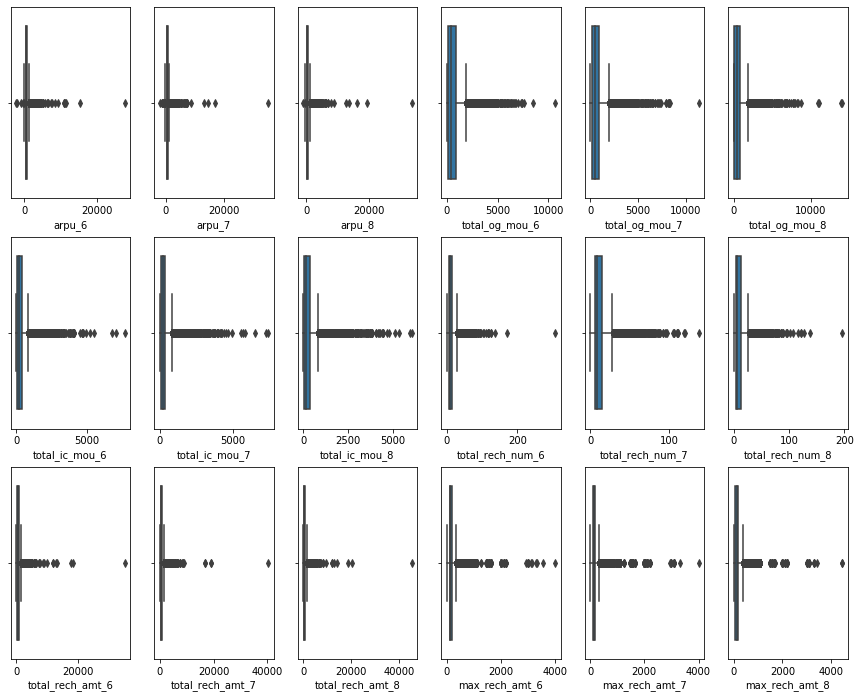

In [34]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
var=['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7',
 'total_ic_mou_8','total_rech_num_6','total_rech_num_7', 'total_rech_num_8','total_rech_amt_6','total_rech_amt_7',
 'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

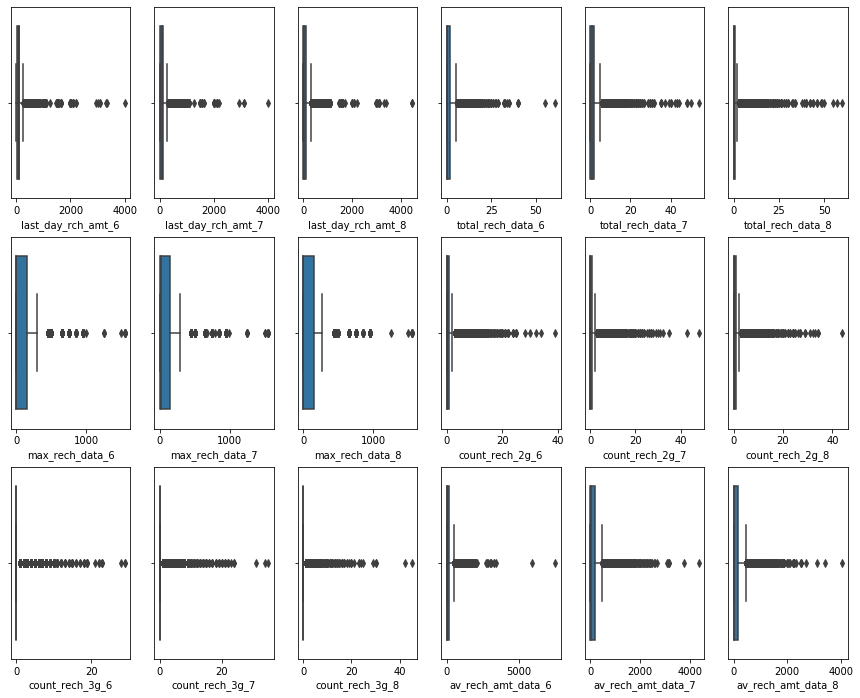

In [35]:
plt.figure(figsize=(15,12))
var=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8',
     'max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
     'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

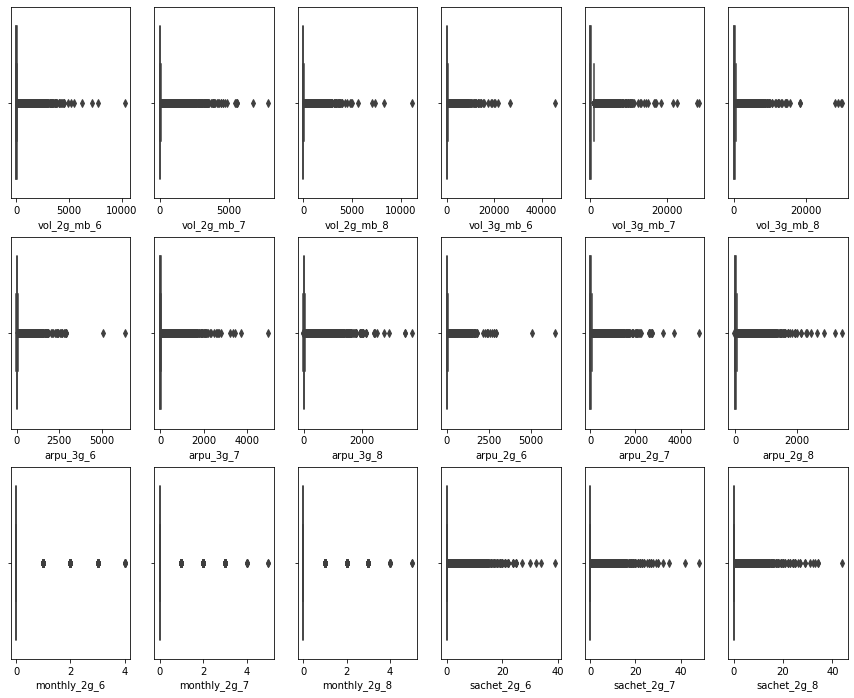

In [36]:
plt.figure(figsize=(15,12))
var=['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','arpu_3g_6','arpu_3g_7','arpu_3g_8',
 'arpu_2g_6','arpu_2g_7','arpu_2g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

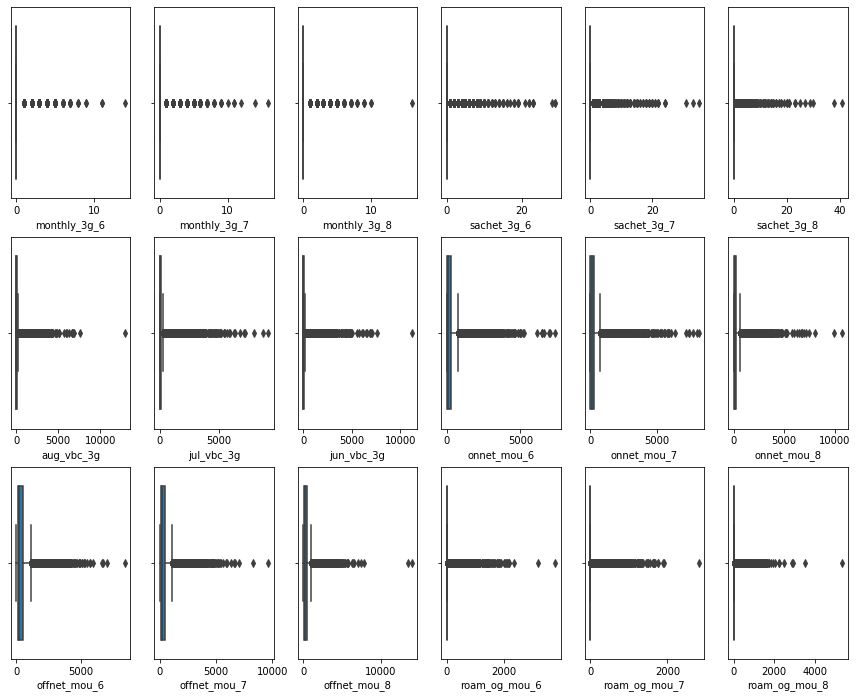

In [37]:
plt.figure(figsize=(15,12))
var=['monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aug_vbc_3g','jul_vbc_3g',
 'jun_vbc_3g','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_og_mou_6',
 'roam_og_mou_7','roam_og_mou_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

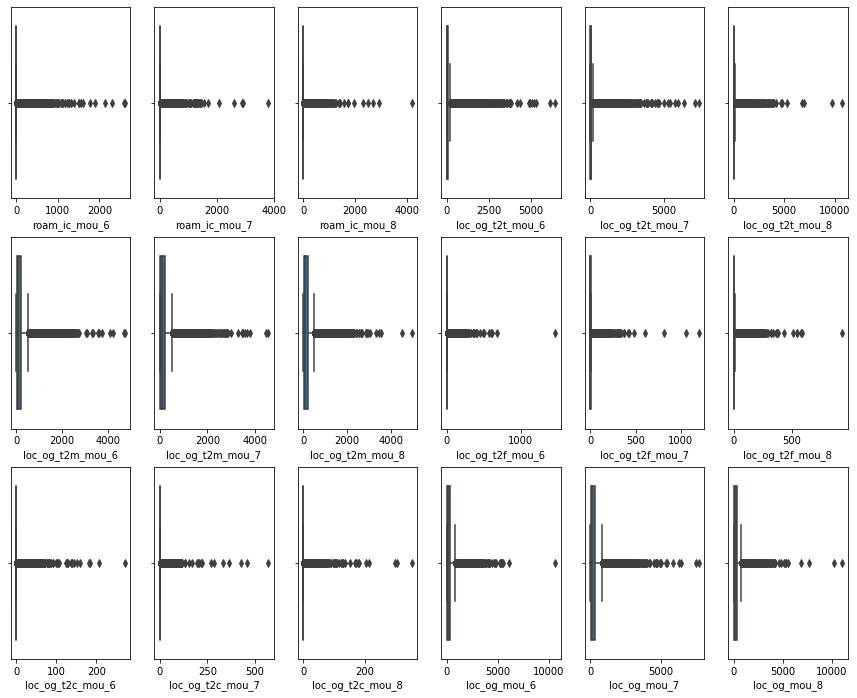

In [38]:
plt.figure(figsize=(15,12))
var=['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

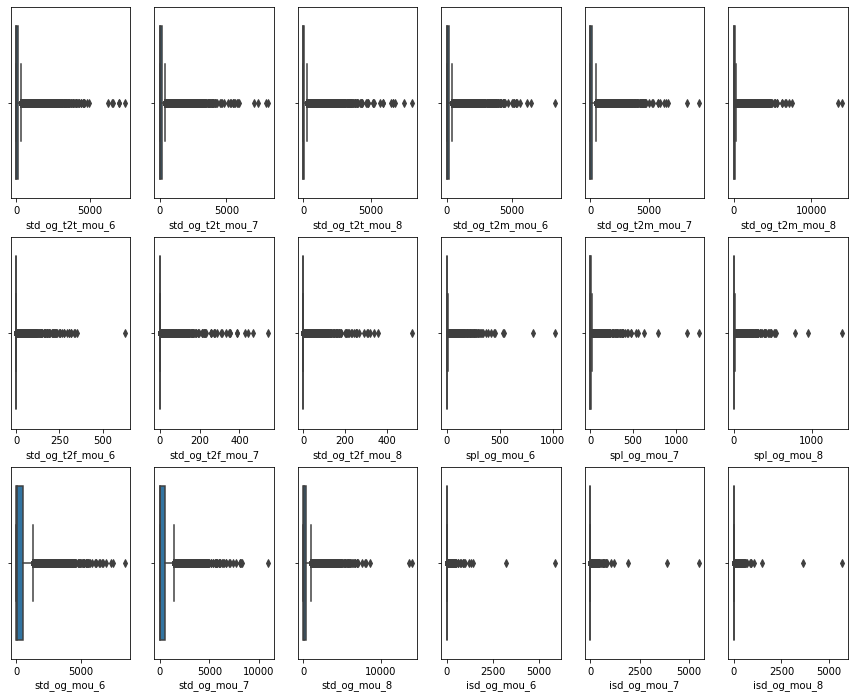

In [39]:
plt.figure(figsize=(15,12))
var=['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
 'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
 'std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

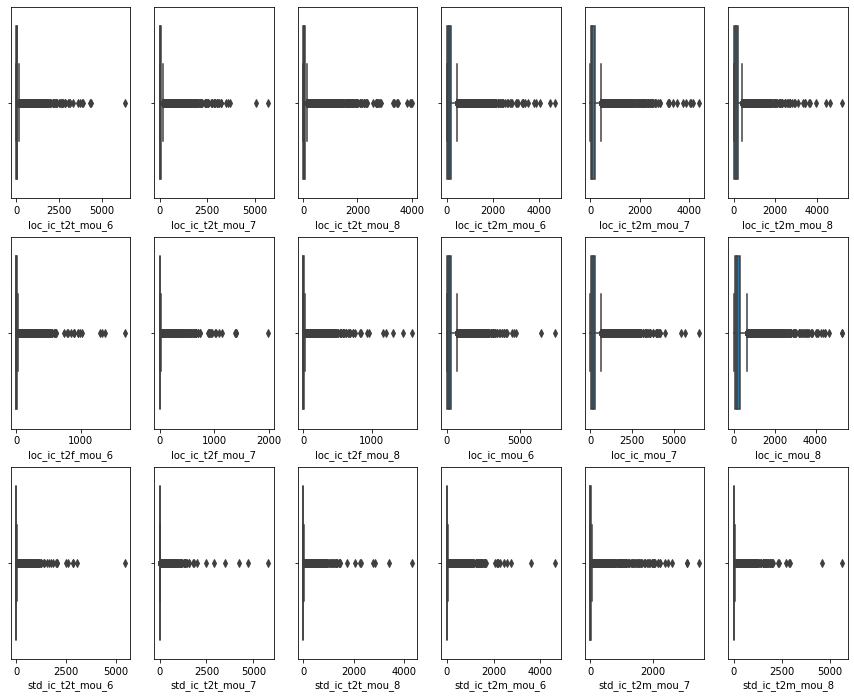

In [40]:
plt.figure(figsize=(15,12))
var=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
 'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8']
for i in enumerate(var):
    plt.subplot(3,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

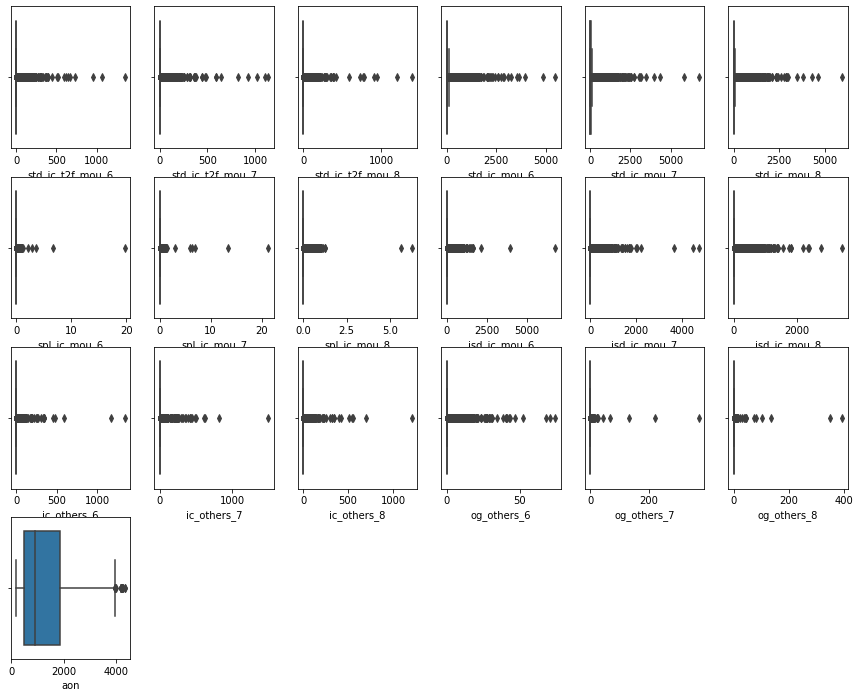

In [41]:
plt.figure(figsize=(15,12))
var=['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_mou_6',
 'std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
 'ic_others_6','ic_others_7','ic_others_8','og_others_6','og_others_7','og_others_8','aon']
for i in enumerate(var):
    plt.subplot(4,6,i[0]+1)
    sns.boxplot(x= i[1], data=df2)

In [42]:
# Appling capping for treating of outliers
for col in df2.columns:
    percentiles = df2[col].quantile([0.01,0.99]).values
    df2[col][df2[col] <= percentiles[0]] = percentiles[0]
    df2[col][df2[col] >= percentiles[1]] = percentiles[1]

In [43]:
df2.shape

(30015, 151)

### Feature scaling

In [44]:
# Using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_vars = ['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_onnet_offnet_mou_678', 'total_loc_og_ic_mou_678', 'total_std_og_ic_mou_678', 'total_isd_og_ic_mou_678', 'total_og_ic_mou_678']

df2[num_vars] = scaler.fit_transform(df2[num_vars])

df2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,ic_others_8,og_others_6,og_others_7,og_others_8,total_onnet_offnet_mou_678,total_loc_og_ic_mou_678,total_std_og_ic_mou_678,total_isd_og_ic_mou_678,total_og_ic_mou_678,churn
0,-1.074457,-1.022364,-0.800169,-1.010690,-1.011328,-0.911998,-0.922510,-0.925002,-0.871096,-0.901806,...,-0.264832,-0.055820,7.716538,-0.134947,-0.764719,-0.574916,-0.639157,-0.217073,-1.336114,1
7,1.460356,2.255528,3.923511,-0.234045,-0.068938,-0.353742,1.055292,0.798796,0.460278,-0.784731,...,4.834522,-0.383219,-0.130446,-0.134947,-0.259562,0.460123,-0.419761,0.224783,0.146298,1
8,-0.547208,-0.221234,-1.003822,-0.200863,-0.343624,-0.638482,-0.594613,-0.836996,-0.836184,0.854309,...,-0.264832,-0.383219,-0.130446,-0.134947,-0.496680,-0.426062,-0.639394,-0.283599,-0.727068,0
16,-0.395276,-0.776738,-0.869195,-0.458215,-0.568920,-0.539923,0.229393,0.253645,0.037937,-0.199360,...,-0.264832,-0.383219,-0.130446,-0.134947,-0.631718,-0.023357,-0.538728,-0.281596,-0.413278,0
21,-0.152557,0.083529,0.329331,0.359848,0.580034,0.791563,-0.268705,-0.517591,-0.067176,1.205532,...,-0.264832,-0.383219,-0.130446,-0.134947,0.598387,-0.530710,0.977190,-0.283599,0.387736,0


In [45]:
df2.columns.tolist()
total_col= df2.columns.tolist()
print(total_col)
print(len(total_col))

['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6

### Splitting the data

In [46]:
import sklearn
from sklearn.model_selection import train_test_split

In [47]:
# Putting feature variable to X
X = df2.drop(['churn'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,ic_others_7,ic_others_8,og_others_6,og_others_7,og_others_8,total_onnet_offnet_mou_678,total_loc_og_ic_mou_678,total_std_og_ic_mou_678,total_isd_og_ic_mou_678,total_og_ic_mou_678
0,-1.074457,-1.022364,-0.800169,-1.010690,-1.011328,-0.911998,-0.922510,-0.925002,-0.871096,-0.901806,...,-0.120607,-0.264832,-0.055820,7.716538,-0.134947,-0.764719,-0.574916,-0.639157,-0.217073,-1.336114
7,1.460356,2.255528,3.923511,-0.234045,-0.068938,-0.353742,1.055292,0.798796,0.460278,-0.784731,...,4.041023,4.834522,-0.383219,-0.130446,-0.134947,-0.259562,0.460123,-0.419761,0.224783,0.146298
8,-0.547208,-0.221234,-1.003822,-0.200863,-0.343624,-0.638482,-0.594613,-0.836996,-0.836184,0.854309,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-0.496680,-0.426062,-0.639394,-0.283599,-0.727068
16,-0.395276,-0.776738,-0.869195,-0.458215,-0.568920,-0.539923,0.229393,0.253645,0.037937,-0.199360,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-0.631718,-0.023357,-0.538728,-0.281596,-0.413278
21,-0.152557,0.083529,0.329331,0.359848,0.580034,0.791563,-0.268705,-0.517591,-0.067176,1.205532,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,0.598387,-0.530710,0.977190,-0.283599,0.387736


In [48]:
# Putting response variable to y
y = df2['churn']
y.head()

0     1
7     1
8     0
16    0
21    0
Name: churn, dtype: int32

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
#dt for decision tree
#rf for randon forest
#lg for logistic regression
X_train_dt=X_train.copy()
X_test_dt=X_test.copy()
X_train_rf=X_train.copy()
X_test_rf=X_test.copy()
X_train_lg=X_train.copy()
X_test_lg=X_test.copy()

In [51]:
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,ic_others_7,ic_others_8,og_others_6,og_others_7,og_others_8,total_onnet_offnet_mou_678,total_loc_og_ic_mou_678,total_std_og_ic_mou_678,total_isd_og_ic_mou_678,total_og_ic_mou_678
50057,0.250175,-0.374196,0.295717,-0.346672,-0.585625,-0.335089,0.295313,0.058048,0.030923,0.503086,...,-0.263928,-0.244623,-0.383219,-0.130446,-0.134947,-0.527864,0.268495,-0.627535,-0.283599,-0.343868
18658,-0.356439,-0.900780,-0.843091,-0.883265,-0.906979,-0.866035,0.819772,0.299919,0.376206,0.268937,...,-0.263928,-0.264832,-0.152447,-0.130446,-0.134947,-1.052788,0.017220,-0.647977,-0.283599,-0.597875
4697,-0.826010,-1.387557,-0.651606,-1.010690,-1.011328,-0.880065,-0.773305,-0.833444,-0.689648,-0.901806,...,-0.241256,-0.264832,-0.383219,-0.130446,-0.134947,-1.144168,-0.885583,-0.866468,-0.283599,-1.261079
15253,-0.727943,-0.863809,-0.025365,-0.644439,-0.652139,-0.276945,-0.144820,0.036240,0.271219,-0.667657,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-0.645652,-0.155768,-0.475005,-0.283599,-0.471750
39182,0.017266,-0.265829,-0.997033,-0.761048,-1.011328,-0.911998,-0.724465,-0.925002,-0.888206,0.503086,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-0.759258,-0.905154,-0.849212,-0.283599,-1.232263


In [52]:
X_train.shape

(21010, 150)

In [53]:
X_test.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,ic_others_7,ic_others_8,og_others_6,og_others_7,og_others_8,total_onnet_offnet_mou_678,total_loc_og_ic_mou_678,total_std_og_ic_mou_678,total_isd_og_ic_mou_678,total_og_ic_mou_678
56614,-0.786598,-0.635882,-0.804349,-0.777854,-0.916260,-0.892771,-0.522252,-0.838417,-0.864051,-0.784731,...,-0.263928,-0.247991,-0.383219,7.716538,-0.134947,-0.911913,-0.800439,-0.842261,-0.283599,-1.153293
83708,-0.889768,-1.270896,-0.665755,-1.010690,-1.011328,-0.909910,-0.893907,-0.848889,-0.837285,-1.018880,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-1.153309,-0.959941,-0.894964,-0.283599,-1.313907
20895,0.256889,0.908456,0.340534,-0.621707,-0.653840,-0.737966,-0.534723,0.172806,-0.245982,-0.901806,...,-0.255426,-0.237887,-0.383219,-0.130446,-0.134947,-0.805330,-0.574486,-0.461070,-0.173335,-0.723967
91475,-1.173504,-1.040417,-0.897278,-0.986811,-0.958380,-0.900631,-0.562189,-0.580236,-0.419630,-1.253028,...,-0.025866,-0.035799,-0.383219,-0.130446,-0.134947,-1.123389,-0.706863,-0.811315,-0.283599,-1.129562
1993,-1.071346,-0.539177,-0.460379,-0.734397,-0.713826,-0.717766,-0.608915,-0.610571,-0.639859,-0.667657,...,-0.263928,-0.264832,-0.383219,-0.130446,-0.134947,-0.866826,-0.503473,-0.847329,-0.263306,-0.966211


In [54]:
#dt for decision tree
#rf for randon forest
#lg for logistic regression
y_train_dt=y_train.copy()
y_test_dt=y_test.copy()
y_train_rf=y_train.copy()
y_test_rf=y_test.copy()
y_train_lg=y_train.copy()
y_test_lg=y_test.copy()

In [55]:
y_train.head()

50057    0
18658    0
4697     0
15253    0
39182    1
Name: churn, dtype: int32

In [56]:
y_test.head()

56614    1
83708    0
20895    0
91475    0
1993     0
Name: churn, dtype: int32

## PCA

In [57]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(svd_solver= 'randomized', random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [58]:
pca.components_

array([[-8.17798610e-02, -9.02482669e-02, -7.43804806e-02, ...,
        -1.64823474e-01, -3.49819228e-03, -1.81101303e-01],
       [ 1.04058970e-01,  1.14024046e-01,  1.29253102e-01, ...,
        -1.42672961e-02,  3.92594705e-02,  1.21884995e-01],
       [ 1.09012576e-01,  1.42544020e-01,  1.30807015e-01, ...,
         1.71481047e-01, -8.68192595e-03,  6.39805504e-02],
       ...,
       [-5.98503692e-04, -1.45833869e-04, -5.52109005e-04, ...,
        -2.05634427e-03,  2.92169180e-04,  2.49036606e-03],
       [-1.12220811e-03,  4.43844494e-04,  5.79606375e-04, ...,
         1.30488524e-03,  2.44120410e-04, -2.17686587e-03],
       [-7.17714370e-06, -4.80432008e-04,  3.38185682e-04, ...,
         1.22677738e-04,  1.75805377e-04, -1.22418768e-03]])

In [59]:
pca.explained_variance_ratio_

array([1.26688370e-01, 1.09139200e-01, 7.56204585e-02, 5.42225126e-02,
       4.28611542e-02, 3.17006561e-02, 2.89514803e-02, 2.73472757e-02,
       2.53925676e-02, 2.30329198e-02, 2.13861391e-02, 2.00126153e-02,
       1.85998166e-02, 1.64575263e-02, 1.53029924e-02, 1.46071093e-02,
       1.41784249e-02, 1.40303007e-02, 1.37099074e-02, 1.30215232e-02,
       1.14244693e-02, 1.01556908e-02, 9.71354337e-03, 8.98702761e-03,
       8.89009847e-03, 8.40144423e-03, 8.10450432e-03, 7.68546798e-03,
       7.45260569e-03, 7.40654327e-03, 7.04225578e-03, 6.46971913e-03,
       6.29261168e-03, 6.08600101e-03, 5.88677362e-03, 5.84538084e-03,
       5.67179011e-03, 5.43365957e-03, 5.40115608e-03, 5.25939800e-03,
       5.13101056e-03, 4.90211501e-03, 4.84133860e-03, 4.72062726e-03,
       4.69554295e-03, 4.46875754e-03, 4.26964693e-03, 4.18466373e-03,
       4.02969880e-03, 3.88641361e-03, 3.75103543e-03, 3.65645174e-03,
       3.54222948e-03, 3.37431568e-03, 3.28335100e-03, 3.11150488e-03,
      

### Plotting the scree plot

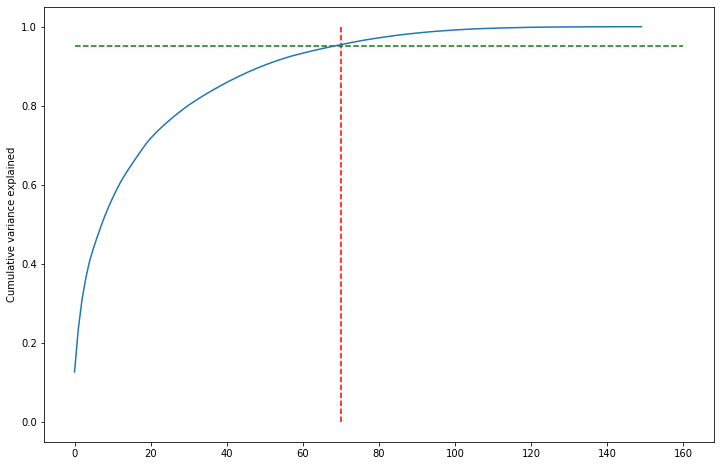

In [60]:
var_cumm=np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumm)
plt.ylabel("Cumulative variance explained")
plt.show()

##### Number of PC'S we can go with are 70 variables which gives 95% of the variance

### performing dimentionality reduction

In [61]:
from sklearn.decomposition import IncrementalPCA
df_pca = IncrementalPCA(n_components = 70)
#df_pca=pd.DataFrame(df_pca)
X_train_pca = df_pca.fit_transform(X_train)
X_train_pca.shape

(21010, 70)

In [62]:
X_test_pca = df_pca.transform(X_test)
X_test_pca.shape

(9005, 70)

In [63]:
X_train_pca_dt=X_train_pca.copy()
X_test_pca_dt=X_test_pca.copy()

### 1. Logistic Regression with PCA

In [64]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(class_weight='balanced')

In [65]:
model_pca = Log.fit(X_train_pca, y_train_lg)

In [66]:
test_pred = model_pca.predict_proba(X_test_pca)[:,1]
test_pred

array([0.88260309, 0.26449974, 0.12407624, ..., 0.78768984, 0.83077031,
       0.35873965])

In [67]:
test_pred[:10]

array([0.88260309, 0.26449974, 0.12407624, 0.13803127, 0.06946232,
       0.77295668, 0.8830607 , 0.00136017, 0.10077658, 0.47353166])

In [68]:
# Converting test_pred to a dataframe which is an array
test_pred_1 = pd.DataFrame(test_pred)

In [69]:
# Let's see the head
test_pred_1.head()

,0
0,0.882603
1,0.264500
2,0.124076
3,0.138031
4,0.069462


In [70]:
# Converting y_test_lg to dataframe
y_test_df = pd.DataFrame(y_test_lg)

In [71]:
# Removing index for both dataframes to append them side by side 
test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [72]:
# Appending y_test_df and test_pred_1
y_pred_final = pd.concat([y_test_df, test_pred_1],axis=1)
y_pred_final.head()

,churn,0
0,1,0.882603
1,0,0.264500
2,0,0.124076
3,0,0.138031
4,0,0.069462


In [73]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','churn_prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,churn_prob
0,1,0.882603
1,0,0.264500
2,0,0.124076
3,0,0.138031
4,0,0.069462


In [74]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,churn,churn_prob,final_predicted
0,1,0.882603,1
1,0,0.264500,0
2,0,0.124076,0
3,0,0.138031,0
4,0,0.069462,0


In [75]:
y_pred_final.shape

(9005, 3)

In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8185452526374236

In [77]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6800, 1493],
       [ 141,  571]], dtype=int64)

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model with PCA
TP / float(TP+FN)

0.8019662921348315

In [80]:
# Let us calculate specificity of logistic regression model with PCA
TN / float(TN+FP)

0.8199686482575667

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8293
           1       0.28      0.80      0.41       712

    accuracy                           0.82      9005
   macro avg       0.63      0.81      0.65      9005
weighted avg       0.92      0.82      0.85      9005



### ROC curve

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.churn_prob, drop_intermediate = False )

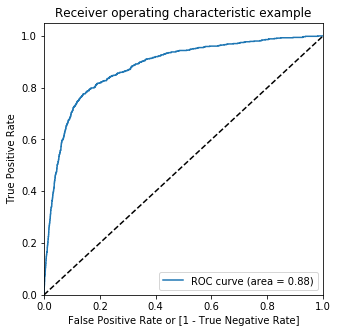

In [84]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

#### Finding Optimal Cutoff Point

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.882603,1,1,1,1,1,1,1,1,1,1,0
1,0,0.264500,0,1,1,1,0,0,0,0,0,0,0
2,0,0.124076,0,1,1,0,0,0,0,0,0,0,0
3,0,0.138031,0,1,1,0,0,0,0,0,0,0,0
4,0,0.069462,0,1,0,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.079067  1.000000  0.000000
0.1   0.1  0.405775  0.964888  0.357772
0.2   0.2  0.561799  0.938202  0.529483
0.3   0.3  0.670738  0.900281  0.651031
0.4   0.4  0.751916  0.848315  0.743639
0.5   0.5  0.818545  0.801966  0.819969
0.6   0.6  0.867518  0.750000  0.877608
0.7   0.7  0.895725  0.664326  0.915591
0.8   0.8  0.913826  0.523876  0.947305
0.9   0.9  0.924820  0.276685  0.980465


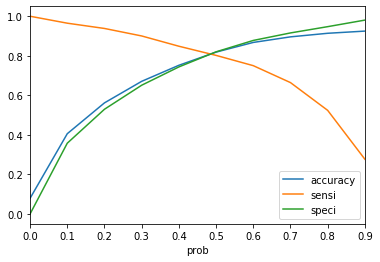

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [88]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,churn,churn_prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.882603,1,1,1,1,1,1,1,1,1,1,0
1,0,0.264500,0,1,1,1,0,0,0,0,0,0,0
2,0,0.124076,0,1,1,0,0,0,0,0,0,0,0
3,0,0.138031,0,1,1,0,0,0,0,0,0,0,0
4,0,0.069462,0,1,0,0,0,0,0,0,0,0,0


In [89]:
# Let's check the overall accuracy for logistic regression with PCA
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8185452526374236

In [90]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6800, 1493],
       [ 141,  571]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of logistic regression model with PCA
TP / float(TP+FN)

0.8019662921348315

In [93]:
# Let us calculate specificity of Logistic Regression model with PCA
TN / float(TN+FP)

0.8199686482575667

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8293
           1       0.28      0.80      0.41       712

    accuracy                           0.82      9005
   macro avg       0.63      0.81      0.65      9005
weighted avg       0.92      0.82      0.85      9005



### 2. Decision Trees with PCA

In [95]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, except for max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_default.fit(X_train_pca_dt, y_train_dt)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict((X_test_pca_dt))

# Printing classification report
print(classification_report(y_test_dt, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8293
           1       0.24      0.70      0.36       712

    accuracy                           0.80      9005
   macro avg       0.60      0.76      0.62      9005
weighted avg       0.91      0.80      0.84      9005



### Hyperparameter Tuning (Decision Trees)

### Tuning max_depth

In [97]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_pca_dt, y_train_dt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [98]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.392670,0.021893,0.004707,0.001512,1,{'max_depth': 1},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,6,0.916820,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025
1,0.772962,0.032506,0.003801,0.000502,2,{'max_depth': 2},0.916726,0.916726,0.916706,0.919305,...,0.917277,0.001017,5,0.916820,0.916820,0.916825,0.920221,0.916771,0.917492,0.001365
2,1.111831,0.072456,0.004200,0.000505,3,{'max_depth': 3},0.921009,0.921485,0.919800,0.919781,...,0.919990,0.001250,1,0.920688,0.920450,0.921942,0.920340,0.921233,0.920931,0.000592
3,1.347596,0.041856,0.004412,0.001827,4,{'max_depth': 4},0.917678,0.920771,0.916468,0.920257,...,0.918610,0.001636,3,0.921104,0.921283,0.922953,0.920816,0.921649,0.921561,0.000747
4,1.637556,0.019255,0.004310,0.001605,5,{'max_depth': 5},0.918867,0.918630,0.918372,0.921209,...,0.919277,0.001014,2,0.926162,0.925091,0.927475,0.925278,0.925278,0.925857,0.000891


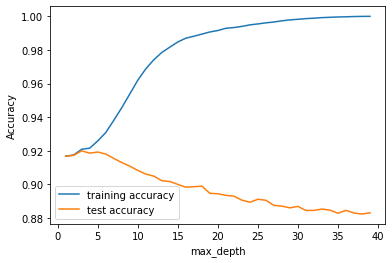

In [99]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [100]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_pca_dt, y_train_dt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [101]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.486402,0.408425,0.005291,1.883574e-03,5,{'min_samples_leaf': 5},0.890792,0.897216,0.902903,0.899072,...,0.896002,0.004927,10,0.966205,0.967097,0.967277,0.965316,0.965792,0.966337,0.000751
1,4.197299,0.272967,0.003997,3.161557e-04,25,{'min_samples_leaf': 25},0.910540,0.918154,0.916468,0.911688,...,0.915088,0.003341,9,0.936515,0.934135,0.936280,0.936225,0.934916,0.935614,0.000928
2,3.741741,0.188823,0.005305,1.476556e-03,45,{'min_samples_leaf': 45},0.913871,0.920771,0.919562,0.922637,...,0.919277,0.002929,3,0.930208,0.929494,0.930866,0.930335,0.929621,0.930105,0.000500
3,3.366143,0.158065,0.003993,9.344062e-07,65,{'min_samples_leaf': 65},0.918154,0.923150,0.919800,0.920257,...,0.919657,0.002112,2,0.926043,0.925864,0.928010,0.927241,0.927122,0.926856,0.000800
4,4.469390,0.736210,0.005597,1.620642e-03,85,{'min_samples_leaf': 85},0.915774,0.921961,0.918134,0.920257,...,0.918991,0.002075,4,0.924674,0.924555,0.927356,0.926527,0.925338,0.925690,0.001088


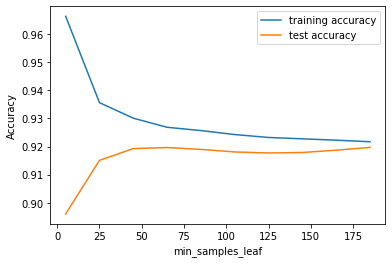

In [102]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [103]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,
                              class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_pca_dt, y_train_dt)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [104]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.607215,0.429498,0.010597,0.002713,5,{'min_samples_split': 5},0.882941,0.884606,0.882199,0.887646,...,0.884293,0.001876,1,0.995538,0.997025,0.994705,0.996193,0.995181,0.995728,0.000810
1,6.086787,0.530342,0.005405,0.000497,25,{'min_samples_split': 25},0.851297,0.849155,0.846502,0.856939,...,0.850928,0.003436,2,0.939489,0.942940,0.938660,0.946636,0.941638,0.941873,0.002824
2,5.830154,0.541251,0.006411,0.002270,45,{'min_samples_split': 45},0.822508,0.812515,0.817230,0.827422,...,0.820133,0.005020,3,0.893140,0.896174,0.893920,0.904515,0.901957,0.897941,0.004510
3,6.308175,0.546874,0.008496,0.001806,65,{'min_samples_split': 65},0.803712,0.787295,0.794384,0.812188,...,0.797239,0.009451,4,0.865532,0.863509,0.867087,0.876197,0.865786,0.867622,0.004438
4,5.735635,0.508433,0.007001,0.001997,85,{'min_samples_split': 85},0.790388,0.779443,0.789148,0.796477,...,0.786197,0.007633,5,0.844232,0.847980,0.849655,0.852757,0.844310,0.847787,0.003255


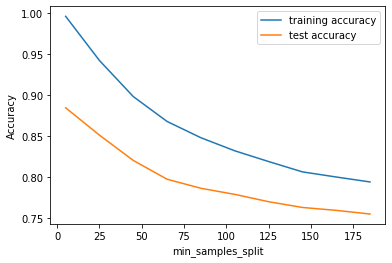

In [105]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [106]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca_dt,y_train_dt)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [107]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.526284,0.264373,0.005998,0.001953,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.921009,0.922674,0.919324,0.923590,0.920257,0.921371,0.001561,1
1,4.891208,0.130072,0.005106,0.001324,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.921009,0.922674,0.919324,0.923590,0.920257,0.921371,0.001561,1
2,4.711742,0.303244,0.005491,0.002046,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.921723,0.920057,0.916944,0.921923,0.920257,0.920181,0.001784,3
3,4.824029,0.240082,0.007490,0.001759,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.921723,0.920057,0.916944,0.921923,0.920257,0.920181,0.001784,3
4,7.136140,0.402799,0.008803,0.000595,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.916726,0.921723,0.909567,0.917639,0.911688,0.915469,0.004348,15
5,7.525409,0.276100,0.006888,0.001684,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.916726,0.921723,0.909567,0.917639,0.911688,0.915469,0.004348,15
6,6.333622,0.403753,0.005598,0.001454,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.922436,0.916964,0.910043,0.918591,0.919305,0.917468,0.004116,13
7,5.300350,0.273256,0.005391,0.001981,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.922436,0.916964,0.910043,0.918591,0.919305,0.917468,0.004116,13
8,1.721909,0.093573,0.003600,0.000372,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.920295,0.918867,0.916706,0.921923,0.917401,0.919039,0.001900,7
9,2.070051,0.344122,0.005392,0.001624,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.920295,0.918867,0.916706,0.921923,0.917401,0.919039,0.001900,7


In [108]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9213707758210375
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [109]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=10,
                                 class_weight='balanced')
clf_gini.fit(X_train_pca_dt, y_train_dt)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [110]:
# accuracy score
clf_gini.score(X_test_pca_dt,y_test_dt)

0.8027762354247641

In [111]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_pca_dt)
print(classification_report(y_test_dt, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8293
           1       0.24      0.70      0.36       712

    accuracy                           0.80      9005
   macro avg       0.61      0.75      0.62      9005
weighted avg       0.91      0.80      0.84      9005



In [112]:
confusion_dt = metrics.confusion_matrix(y_test_dt, y_pred)
confusion_dt

array([[6732, 1561],
       [ 215,  497]], dtype=int64)

In [113]:
TP = confusion_dt[1,1] # true positive 
TN = confusion_dt[0,0] # true negatives
FP = confusion_dt[0,1] # false positives
FN = confusion_dt[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our decision tree model
TP / float(TP+FN)

0.6980337078651685

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8117689617749909

### 3. Random Forest with PCA

In [116]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [117]:
X_train_pca_rf=X_train_pca.copy()
# fit
rfc.fit(X_train_pca_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [118]:
X_test_pca_rf=X_test_pca.copy()
# Making predictions
predictions = rfc.predict(X_test_pca_rf)

In [119]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [120]:
# Let's check the report of our default model
print(classification_report(y_test_rf,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8293
           1       0.57      0.11      0.18       712

    accuracy                           0.92      9005
   macro avg       0.75      0.55      0.57      9005
weighted avg       0.90      0.92      0.90      9005



In [121]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,predictions))

[[8234   59]
 [ 635   77]]


In [122]:
print(accuracy_score(y_test_rf,predictions))

0.9229317046085508


### Hyperparameter Tuning

### Tuning max_depth

In [123]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True )
rf.fit(X_train_pca_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [124]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.670952,0.099918,0.011981,0.001515,2,{'max_depth': 2},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,4,0.916820,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025
1,2.139126,0.223246,0.017569,0.006066,7,{'max_depth': 7},0.920295,0.920295,0.919562,0.920971,...,0.920181,0.000489,3,0.926340,0.926578,0.927059,0.926646,0.927003,0.926725,0.000270
2,3.921211,0.523728,0.017576,0.002304,12,{'max_depth': 12},0.918867,0.925529,0.923132,0.921923,...,0.922418,0.002149,1,0.959600,0.961564,0.959543,0.960854,0.958951,0.960102,0.000958
3,4.019925,0.198919,0.025356,0.007193,17,{'max_depth': 17},0.920295,0.918867,0.918848,0.924304,...,0.920371,0.002036,2,0.984709,0.984649,0.981259,0.985246,0.982926,0.983758,0.001473


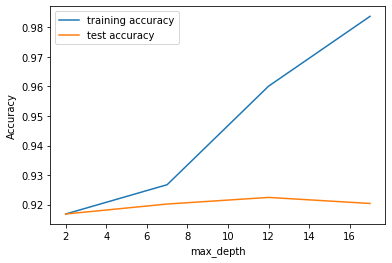

In [125]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [126]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.212938,1.218339,0.097519,0.036867,100,{'n_estimators': 100},0.917202,0.916964,0.917896,0.917163,...,0.917373,0.000342,1,0.917713,0.917296,0.918670,0.917723,0.918080,0.917896,0.000459
1,62.905765,5.244221,0.501077,0.047893,500,{'n_estimators': 500},0.916964,0.916964,0.917420,0.917401,...,0.917325,0.000340,2,0.917475,0.917296,0.918075,0.918139,0.918258,0.917849,0.000387
2,123.693970,12.440190,0.927780,0.238847,900,{'n_estimators': 900},0.916964,0.916726,0.917182,0.917163,...,0.917087,0.000227,4,0.917356,0.917296,0.918075,0.918258,0.918199,0.917837,0.000422
3,185.805747,10.306876,1.369968,0.290716,1300,{'n_estimators': 1300},0.916726,0.916726,0.917182,0.917401,...,0.917182,0.000435,3,0.917356,0.917296,0.917718,0.917842,0.918615,0.917765,0.000473


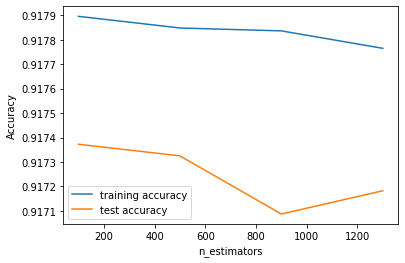

In [128]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [129]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.958618,0.138694,0.020779,0.005156,4,{'max_features': 4},0.916964,0.916964,0.916944,0.917639,...,0.917135,0.000264,5,0.916880,0.917475,0.917242,0.917485,0.916771,0.917170,0.000297
1,1.212346,0.286097,0.014987,0.005548,8,{'max_features': 8},0.917678,0.917440,0.917658,0.917163,...,0.917468,0.000189,4,0.918189,0.917891,0.917956,0.918020,0.918020,0.918015,0.000099
2,2.663349,0.426688,0.016281,0.006486,14,{'max_features': 14},0.919105,0.920057,0.919086,0.920257,...,0.919229,0.000928,3,0.919736,0.919081,0.920157,0.920162,0.920102,0.919848,0.000414
3,3.824195,0.491684,0.021171,0.003893,20,{'max_features': 20},0.920057,0.919581,0.919086,0.920257,...,0.919610,0.000488,1,0.920807,0.919319,0.921228,0.921054,0.922125,0.920907,0.000910
4,4.971858,0.343044,0.020373,0.004238,24,{'max_features': 24},0.918630,0.921247,0.919562,0.920019,...,0.919562,0.001037,2,0.920628,0.920450,0.922418,0.921947,0.922304,0.921549,0.000841


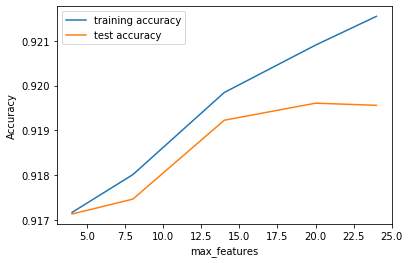

In [131]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [132]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.315240,0.262474,0.026750,0.008402,100,{'min_samples_leaf': 100},0.916726,0.916964,0.916706,0.916925,...,0.917040,0.000431,1,0.91682,0.917534,0.917361,0.916771,0.919031,0.917504,0.000820
1,2.968383,0.310647,0.024762,0.007870,150,{'min_samples_leaf': 150},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,2,0.91682,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025
2,2.171265,0.231258,0.018565,0.006388,200,{'min_samples_leaf': 200},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,2,0.91682,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025
3,1.754948,0.162231,0.018356,0.005934,250,{'min_samples_leaf': 250},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,2,0.91682,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025
4,2.119662,0.267841,0.024564,0.005396,300,{'min_samples_leaf': 300},0.916726,0.916726,0.916706,0.916925,...,0.916802,0.000101,2,0.91682,0.916820,0.916825,0.916771,0.916771,0.916802,0.000025


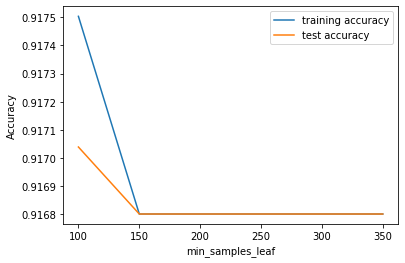

In [134]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [135]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.090338,0.341067,0.030152,0.006923,200,{'min_samples_split': 200},0.917678,0.919819,0.918372,0.920019,...,0.918515,0.001267,1,0.919260,0.920628,0.922418,0.921947,0.917782,0.920407,0.001713
1,4.909610,0.679017,0.033241,0.006067,250,{'min_samples_split': 250},0.916964,0.916964,0.918134,0.918115,...,0.917706,0.000612,2,0.918070,0.917475,0.919443,0.918258,0.920519,0.918753,0.001090
2,5.084945,0.375334,0.027065,0.011570,300,{'min_samples_split': 300},0.917440,0.918630,0.916944,0.917163,...,0.917515,0.000585,3,0.918189,0.918189,0.918253,0.917901,0.917187,0.917944,0.000398
3,4.244412,0.498377,0.028067,0.010954,350,{'min_samples_split': 350},0.916964,0.916964,0.917658,0.916925,...,0.917277,0.000406,4,0.917118,0.916880,0.918075,0.917068,0.917961,0.917420,0.000496
4,4.355002,0.296308,0.025162,0.006769,400,{'min_samples_split': 400},0.916726,0.917202,0.916944,0.916925,...,0.916944,0.000152,5,0.916939,0.917534,0.917301,0.916830,0.918020,0.917325,0.000429


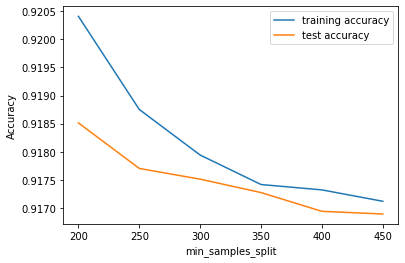

In [137]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [138]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [139]:
# Fit the grid search to the data
grid_search.fit(X_train_pca_rf, y_train_rf)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 25.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [140]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9168015230842456 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [170]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=7,
                             n_estimators=100,
                            class_weight='balanced')

In [171]:
# fit
rfc.fit(X_train_pca_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [172]:
# predict
predictions = rfc.predict(X_test_pca_rf)

In [173]:
print(accuracy_score(y_test_rf,predictions))

0.8529705719044975


In [174]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_rf,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8293
           1       0.32      0.74      0.44       712

    accuracy                           0.85      9005
   macro avg       0.65      0.80      0.68      9005
weighted avg       0.92      0.85      0.88      9005



In [175]:
confusion_rf=(confusion_matrix(y_test_rf,predictions))

In [176]:
TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [177]:
# Let's see the sensitivity of random forest model
TP / float(TP+FN)

0.7429775280898876

In [178]:
# Let us calculate specificity of random forest model
TN / float(TN+FP)

0.8624140841673701

### 4. Random Forest without PCA

#### Default Hyperparameters

In [179]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [181]:
y_train_rff=y_train.copy()
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [182]:
# Making predictions
predictions = rfc.predict(X_test_rf)

In [183]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [184]:
# Let's check the report of our default model
print(classification_report(y_test_rf,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.80      0.37      0.50       712

    accuracy                           0.94      9005
   macro avg       0.88      0.68      0.74      9005
weighted avg       0.94      0.94      0.93      9005



In [185]:
# Printing confusion matrix
print(confusion_matrix(y_test_rf,predictions))

[[8229   64]
 [ 450  262]]


In [186]:
print(accuracy_score(y_test_rf,predictions))

0.9429205996668517


### Hyperparameter Tuning

### Tuning max_depth

In [187]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [188]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.271594,0.018142,0.009386,0.000201,2,{'max_depth': 2},0.884606,0.878420,0.875059,0.859557,...,0.872727,0.008920,4,0.884512,0.883858,0.869229,0.863050,0.861086,0.872347,0.010035
1,0.753695,0.008852,0.012279,0.000398,7,{'max_depth': 7},0.908161,0.910302,0.917182,0.905499,...,0.910376,0.003877,3,0.918427,0.931398,0.925155,0.913915,0.924862,0.922751,0.006029
2,1.094066,0.042908,0.016270,0.003118,12,{'max_depth': 12},0.936236,0.929812,0.935031,0.934063,...,0.934793,0.002957,2,0.970250,0.970250,0.972335,0.970730,0.968350,0.970383,0.001272
3,1.173019,0.010367,0.015580,0.000488,17,{'max_depth': 17},0.943612,0.937188,0.941218,0.940014,...,0.941171,0.002458,1,0.982031,0.982091,0.984412,0.981557,0.982152,0.982449,0.001004


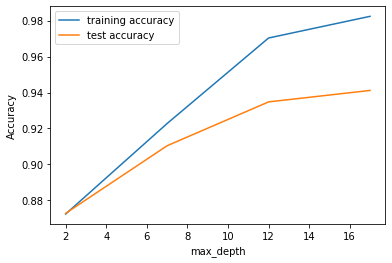

In [189]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [202]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [195]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.293318,0.035843,0.054305,0.001832,100,{'n_estimators': 100},0.942422,0.940043,0.937887,0.943823,...,0.940933,0.002041,3,0.941274,0.943595,0.942884,0.942352,0.941519,0.942325,0.000858
1,21.607633,0.297212,0.243050,0.004258,500,{'n_estimators': 500},0.943136,0.939091,0.938125,0.943585,...,0.940933,0.002154,3,0.941155,0.942940,0.942706,0.942174,0.942055,0.942206,0.000619
2,39.000104,0.368615,0.466941,0.046257,900,{'n_estimators': 900},0.943374,0.939329,0.939553,0.943823,...,0.941218,0.001961,1,0.941096,0.942821,0.943241,0.942352,0.941995,0.942301,0.000735
3,57.246608,1.347592,0.647302,0.028050,1300,{'n_estimators': 1300},0.943136,0.939567,0.938125,0.943585,...,0.940980,0.002089,2,0.941215,0.943357,0.943241,0.942114,0.942114,0.942408,0.000799


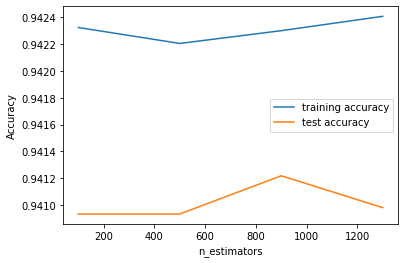

In [196]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [191]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [192]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.213103,0.019116,0.010390,0.000204,4,{'max_features': 4},0.931240,0.924578,0.929081,0.935492,...,0.929891,0.003543,5,0.930684,0.924912,0.936459,0.934499,0.931644,0.931640,0.003939
1,0.338871,0.018315,0.009981,0.000316,8,{'max_features': 8},0.942898,0.939567,0.935745,0.943347,...,0.940219,0.002752,4,0.940620,0.939073,0.942587,0.942650,0.940389,0.941064,0.001375
2,0.561557,0.042949,0.010085,0.000373,14,{'max_features': 14},0.945039,0.940995,0.937649,0.942157,...,0.941028,0.002521,3,0.941334,0.943773,0.942230,0.941043,0.943304,0.942337,0.001067
3,0.774265,0.052289,0.010081,0.000485,20,{'max_features': 20},0.944325,0.939329,0.939553,0.941919,...,0.941171,0.001829,2,0.941036,0.943416,0.944669,0.942828,0.942531,0.942896,0.001184
4,0.876370,0.009009,0.009889,0.000370,24,{'max_features': 24},0.945991,0.940281,0.940505,0.942871,...,0.942075,0.002167,1,0.942702,0.945023,0.944253,0.943364,0.943066,0.943682,0.000844


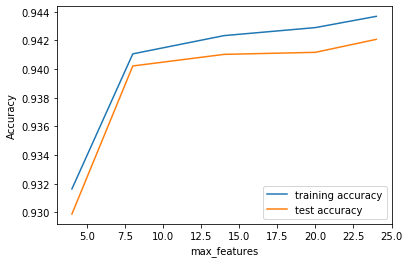

In [193]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [195]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [196]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.031083,0.043158,0.015771,0.002726,100,{'min_samples_leaf': 100},0.940281,0.939567,0.937173,0.940490,...,0.939743,0.001387,2,0.940144,0.942167,0.941873,0.940984,0.942114,0.941456,0.000782
1,0.913701,0.028746,0.013575,0.000733,150,{'min_samples_leaf': 150},0.942898,0.938853,0.935983,0.941681,...,0.939695,0.002412,3,0.940322,0.940441,0.940088,0.940270,0.940092,0.940243,0.000137
2,0.868186,0.051160,0.013178,0.002155,200,{'min_samples_leaf': 200},0.942184,0.940519,0.935745,0.943823,...,0.940124,0.002843,1,0.938895,0.941512,0.939255,0.940627,0.938604,0.939779,0.001110
3,0.795222,0.044154,0.012177,0.001206,250,{'min_samples_leaf': 250},0.938139,0.937426,0.935031,0.939776,...,0.936887,0.002079,4,0.936931,0.940798,0.938244,0.937652,0.935035,0.937732,0.001876
4,0.692014,0.029276,0.011384,0.000370,300,{'min_samples_leaf': 300},0.935046,0.936236,0.936459,0.935730,...,0.936649,0.001637,5,0.934016,0.937526,0.939850,0.936820,0.938902,0.937423,0.002003


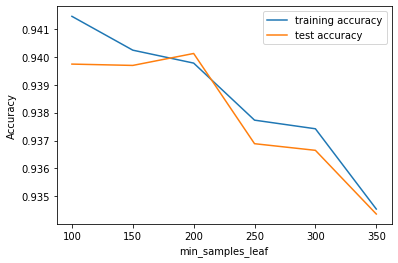

In [197]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [198]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [199]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.353882,0.073267,0.014877,0.001112,200,{'min_samples_split': 200},0.942422,0.939091,0.939553,0.943109,...,0.941076,0.001563,1,0.941810,0.945023,0.945145,0.942174,0.943483,0.943527,0.001388
1,1.316652,0.042884,0.018170,0.006931,250,{'min_samples_split': 250},0.942660,0.939329,0.938839,0.941443,...,0.940743,0.001434,3,0.942167,0.943297,0.943836,0.943721,0.941698,0.942944,0.000858
2,1.270338,0.035516,0.013676,0.000245,300,{'min_samples_split': 300},0.943136,0.940757,0.939315,0.942157,...,0.941076,0.001396,1,0.939906,0.943535,0.943539,0.941995,0.941222,0.942040,0.001393
3,1.201067,0.036748,0.013178,0.000399,350,{'min_samples_split': 350},0.944801,0.939329,0.937887,0.942395,...,0.940647,0.002569,4,0.940560,0.941215,0.942944,0.940687,0.940211,0.941123,0.000966
4,1.204960,0.036353,0.013975,0.001578,400,{'min_samples_split': 400},0.940281,0.938615,0.938363,0.941681,...,0.939457,0.001323,6,0.938895,0.941036,0.940743,0.941222,0.938723,0.940124,0.001086


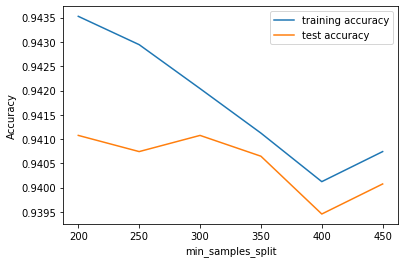

In [200]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [201]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [207]:
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [208]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.897144217039505 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [209]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                            class_weight='balanced')

In [210]:
# fit
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [211]:
# predict
predictions = rfc.predict(X_test_rf)

In [212]:
print(accuracy_score(y_test_rf,predictions))

0.902387562465297


In [225]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_rf,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      8293
           1       0.43      0.76      0.55       712

    accuracy                           0.90      9005
   macro avg       0.71      0.84      0.75      9005
weighted avg       0.94      0.90      0.91      9005



In [226]:
confusion_3 = metrics.confusion_matrix(y_test_rf, predictions )
confusion_3

array([[7582,  711],
       [ 168,  544]], dtype=int64)

In [227]:
TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.7640449438202247

In [229]:
# Let us calculate specificity
TN / float(TN+FP)

0.9142650428071868

In [230]:
rfc.feature_importances_

array([2.03590954e-03, 3.82947058e-03, 6.18178447e-02, 2.04560620e-03,
       3.11409167e-03, 6.43480874e-02, 2.37102189e-03, 4.34621212e-03,
       8.45013964e-02, 9.79129979e-04, 1.16219716e-03, 8.40910689e-03,
       1.74053453e-03, 3.67776227e-03, 5.78492998e-02, 1.09058145e-03,
       1.09262790e-03, 2.84435819e-02, 4.50464510e-04, 6.25003834e-04,
       5.15743412e-02, 2.41863444e-04, 5.23798012e-04, 8.59365550e-03,
       8.56930392e-04, 1.15705479e-03, 2.45705245e-02, 2.41069032e-04,
       3.76538369e-04, 6.17062470e-03, 3.15376332e-04, 1.12705052e-04,
       1.26294697e-03, 4.63687657e-04, 1.62632965e-03, 2.11150012e-02,
       6.68547266e-04, 1.41611865e-03, 1.35164249e-02, 3.75571388e-04,
       8.56356818e-04, 1.16442325e-02, 3.68094100e-04, 7.88554930e-04,
       7.49403114e-03, 8.25781894e-04, 9.25710730e-04, 5.03056207e-03,
       8.58793331e-05, 6.10174135e-05, 5.36207046e-04, 2.42490556e-05,
       1.22243230e-04, 2.63336999e-04, 3.27025847e-05, 5.57148878e-05,
      

In [231]:
coefficent = pd.DataFrame(rfc.feature_importances_, index = X_train_rf.columns)
coefficent

,0
arpu_6,0.002036
arpu_7,0.003829
arpu_8,0.061818
total_og_mou_6,0.002046
total_og_mou_7,0.003114
total_og_mou_8,0.064348
total_ic_mou_6,0.002371
total_ic_mou_7,0.004346
total_ic_mou_8,0.084501
total_rech_num_6,0.000979


In [232]:
# Renaming the column 
coefficent= coefficent.rename(columns={ 0 : 'coefficent'})
coefficent

,coefficent
arpu_6,0.002036
arpu_7,0.003829
arpu_8,0.061818
total_og_mou_6,0.002046
total_og_mou_7,0.003114
total_og_mou_8,0.064348
total_ic_mou_6,0.002371
total_ic_mou_7,0.004346
total_ic_mou_8,0.084501
total_rech_num_6,0.000979


In [233]:
final_features = coefficent.sort_values(by='coefficent',ascending=False)
final_features

,coefficent
roam_ic_mou_8,0.090877
total_ic_mou_8,0.084501
total_og_mou_8,0.064348
arpu_8,0.061818
total_rech_amt_8,0.057849
roam_og_mou_8,0.057499
last_day_rch_amt_8,0.051574
loc_og_mou_8,0.041160
loc_ic_t2m_mou_8,0.035000
loc_ic_mou_8,0.032191


In [ ]:
# The 10 top features

roam_ic_mou_8
total_ic_mou_8
total_og_mou_8
arpu_8
total_rech_amt_8
roam_og_mou_8
last_day_rch_amt_8
loc_og_mou_8
loc_ic_t2m_mou_8
loc_ic_mou_8

In [ ]:
Based on the top features, we can say that roaming calls is impacting the most.
So, the company should focus on providing better offers for roaming calls to the customers.
Additionally, company should also focus on providing better deals for the incoming and outgoing calls.
Based on the usage of the network for number of years by the customers,we have to provide some discounts and offers for those particular customers.
Also, keeping in mind the others competitors in market, and their offers related to local and roaming calls,
company should be able to provide better offers to the customers who are likely to churn, so that they can be retained. 